# 2. Iris의 세 가지 품종, 분류해볼 수 있겠어요?

## 1. 들어가며

### 학습 전제
---
* scikit-learn을 활용해서 머신러닝을 시도해본 적이 없다.
* scikit-learn에 내장되어 있는 분류 모델을 활용해본 적이 없다.
* 지도학습의 분류 실습을 해 본 적이 없다.
* 머신러닝 모델을 학습시켜보고, 그 성능을 평가해본 적이 없다.

### 학습 목표
---
* scikit-learn에 내장되어 있는 예제 데이터셋의 종류를 알고 활용할 수 있다.
* scikit-learn에 내장되어 있는 분류 모델들을 학습시키고 예측해 볼 수 있다.
* 모델의 성능을 평가하는 지표의 종류에 대해 이해하고, 활용 및 확인해 볼 수 있다.
* Decision Tree, XGBoost, RandomForest, 로지스틱 회귀 모델을 활용해서 간단하게 학습 및 예측해 볼 수 있다.
* 데이터셋을 사용해서 스스로 분류 기초 실습을 진행할 수 있다.

## 2. Iris의 세 가지 품종, 분류해 볼까요? (1) 붓꽃 분류 문제

>_컴퓨터에 사이킷런(scikit-learn) 또는 matplotlib 패키지가 깔려있지 않다면 다음의 명령어로 설치하자._

```bash
pip install scikit-learn
pip install matplotlib
```

<img src="./image/iris.png" />

자, 여기에서 petal과 sepal이 의미하는 바는 무엇일까?

* petal : 꽃잎
* sepal : 꽃받침

사진에서 볼 수 있듯 setosa, versicolor, virginica 세 가지의 붓꽃은 모두 꽃잎과 꽃받침의 크기가 조금씩 다르다. 꽃잎과 꽃받침의 크기뿐만 아니라 색깔도 조금씩 다르다.<br>
물론 전문가가 아니기 때문에 사진만으로 각 품종을 완벽하게 분류해낼 수 없지만, 꽃을 연구하는 식물학자들은 자세히 보지 않아도 금방 분류해 낼 수 있을 것이다.

그렇다면 기계를 학습시킨다는, __머신러닝 기법__을 활용한다면 어떨까? 붓꽃을 잘 분류해낼 수 있을까?

어디 한 번, 얼마나 잘 분류해내는지 바로 확인해보자.

### 1) 붓꽃 분류, 어떤 데이터로 할 건데?
---
붓꽃 데이터가 예제 데이터로 많이 쓰이는 이유는 바로 머신러닝에서 가장 많이 쓰이는 라이브러리 중 하나인 __사이킷런(scikit-learn)__ 에 내장되어 있는 데이터이기 때문이기도 하다.<br>
사이킷런이라고 부르는 scikit-learn은 파이썬을 기반으로 한 머신러닝 생태계에서 오랜 기간 동안 사랑받고 있는 라이브러리이다. 최근에는 TensorFlow, PyTorch 등 딥러닝에 특화된 라이브러리들이 강세를 보이고 있지만, 머신러닝의 다양한 알고리즘과 편리한 프레임워크를 제공한다는 점으로 인해 여전히 많은 데이터 분석가들이 사용하고 있다.

scikit-learn은 예제로 활용해 볼 수 있는 데이터를 몇 가지 제공한다.

* [Scikit-learn 데이터셋](https://scikit-learn.org/stable/datasets.html)

scikit-learn은 간단하고 작은 데이터셋인 Toy datasets과 비교적 복잡하고 현실 세계를 반영한 Real world datasets, 두 가지 종류의 데이터셋을 제공한다.

이 중 Toy datasets의 iris 데이터셋을 사용할 것이다. 데이터셋에는 어떤 정보가 담겼을까?<br>
위에서 확인했던 공식문서에서는 다음과 같이 소개한다.

<img src="./image/iris_data.png" />

내용을 천천히 살펴봅시다. 데이터셋에는 총 150개의 데이터가 있다고 한다. 각 데이터에는 4개의 정보가 담겨있다고 한다.<br>
위에서 봤던 sepal, petal 각각의 길이와 폭, 총 네 가지의 정보를 담고 있는 것으로 보인다. 카테고리를 나타내는 클래스는 앞서 설명한대로 setosa, versicolour, virginica 세 가지가 있다.

데이터셋을 다루기 전에 이렇게 데이터셋의 정보를 먼저 확인하는 것은 중요하다. 데이터를 얼마나 이해하고 있느냐는 그 데이터를 활용한 결과와 성능에 중대한 요소가 되기 때문이다. 따라서 어떤 데이터셋을 다루든, 그 데이터셋이 담고 있는 정보를 먼저 잘 확인하고 시작하는 것을 권한다.

## 3. Iris의 세 가지 품종, 분류해 볼까요? (2) 데이터 준비, 그리고 자세히 살펴보기는 기본!

소개해드린 scikit-learn의 예제 데이터셋은 다음과 같이 `sklearn` 라이브러리의 `datasets` 패키지 안에 있다.<br>
`load_iris`를 import 해와서 iris 데이터를 로딩해보겠다.

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

print(type(dir(iris))) 
# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

<class 'list'>


`iris`에는 어떤 정보들이 담겼을지, `keys()` 라는 메서드로 확인해보겠다.

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

`iris`에는 `data`, `target`, `frame`, `target_names`, `DESCR`, `feature_names`, `filename` 까지 총 6개의 정보가 담겨있다.

차근차근 하나씩 확인해보겠다.<br>
가장 중요한 데이터는 다음과 같이 `iris_data` 변수에 저장한 후, 데이터의 크기를 확인해보겠다.

In [3]:
iris_data = iris.data

print(iris_data.shape) 
#shape는 배열의 형상정보를 출력

(150, 4)


위에서 확인했듯 총 150개의 데이터가 각각 4개의 정보를 담고 있다.<br>
샘플로 하나의 데이터만 확인보자.

In [4]:
iris_data[0]

array([5.1, 3.5, 1.4, 0.2])

0번 index로 접근해서 확인해보니, 총 네 개의 숫자가 나온다.<br>
이는 위에서 확인했던대로, 순서대로 `sepal length`, `sepal width`, `petal length`, `petal width` 를 나타낸다.

이쯤에서 우리가 풀려고 했던 문제를 다시 떠올려보자.

* setosa, versicolor, virginica 세 가지 중 붓꽃의 종류가 무엇인지 맞추고자 함

우리는 꽃잎과 꽃받침의 길이가 주어지는 경우 그 꽃은 세 가지의 붓꽃 품종 중 어떤 것인지를 맞추어 보고 싶었다.<br>
따라서 우리는 머신러닝 모델에게 __꽃잎__, __꽃받침의 길이와 폭__ 정보를 입력했을 때 __붓꽃의 품종__을 출력하도록 학습을 시켜야 한다.

여기서 이렇게 머신러닝 모델이 출력해야 하는 정답을 __라벨(label)__, 또는 __타겟(target)__ 이라고 한다.
붓꽃 데이터에서 타겟 정보는 다음과 같이 `target`으로 볼 수 있다.

In [5]:
iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

`iris` 데이터의 `target`을 `iris_label`이라는 변수에 저장해 보았다.

길이와 형태를 확인하니 총 150개의 데이터가 들어있고, 각 값은 0, 1, 또는 2로 나타나는 것을 확인할 수 있다. 이 숫자들은 무엇을 나타내는 걸까?<br>
라벨의 이름은 다음과 같이 `target_names`에서 확인할 수 있다.

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

우리가 알고 있던대로 `setosa`, `versicolor`, `virginica` 순서대로 담겨있다.<br>
이 순서 그대로 `0`이라면 `setosa`, `1`이라면 `versicolor`, `2`라면 `virginica`를 나타낸다.

나머지 남은 변수들도 한 번 확인해보자.

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

`DESCR`에는 데이터셋의 설명이 담겨있다. 천천히 읽어보자.

__Iris 데이터는 처음 어디에서 사용되었을까?__

* R.A. Fisher라는 사람의 논문에서 처음으로 활용되었다.

`feature_names`에는 다음과 같이 4개의 각 feature에 대한 설명이 담겨있다.

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

마지막으로 `filename`에는 데이터셋 파일이 저장된 경로를 보여준다.

In [9]:
iris.filename

'/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv'

여기까지 데이터셋을 가져오고, 어떤 데이터셋인지 모두 샅샅이 살펴보았다.

## 4. 첫 번째 머신러닝 실습, 간단하고도 빠르게! (1) 머신러닝 모델을 학습시키기 위한 문제지와 정답지 준비

데이터가 준비되었으니 이제 바로 분류하는 머신러닝 모델을 학습시키는 실습을 진행해보자.

처음이라면 복잡하게 느껴질 수도 있지만, 하나씩 따라오시다보면 사실 간단한 과정이라는 것을 느낄 수 있을 것이다.<br>
단계별로, 시작해보겠다!

`pandas`라고 들어보았을 것이다.<br>
판다스라고 불리는 이 라이브러리는 파이썬에서 표 형태로 이루어진 2차원 배열 데이터를 다루는 데에 가장 많이 쓰이는 도구이다. 표 데이터를 활용해서 데이터 분석을 하기도 하고, 또는 대형 데이터의 여러 통계량을 다루기에도 최적화가 되어있다.

`iris` 데이터 또한 행과 열이 있는 2차원 데이터이므로 `pandas`를 활용해서 다뤄볼 것이다.

In [10]:
import pandas as pd

print(pd.__version__)

1.1.4


`pandas`는 코드에서 굉장히 많이 쓰이기 때문에 `pd`라는 약어로 많이 사용한다.

붓꽃 데이터셋을 `pandas`가 제공하는 `DataFrame` 이라는 자료형으로 변환해보자.

In [11]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


`DataFrame`을 만들면서 `data`에는 `iris_data`를 넣어주고, 각 컬럼에는 `feature_names`로 이름을 붙여주었다.<br>
한 가지 더, __정답__ 데이터도 함께 있다면 데이터를 다루기 더 편리하겠죠. `label`이라는 컬럼을 추가해주겠다.

In [12]:
iris_df["label"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


`["label"]` 이라는 코드로 라벨 컬럼을 추가해주었다. 아까 확인했던대로 `0`~`2` 사이의 값들이 잘 들어간 것으로 보인다.

여기서 4가지의 feature 데이터들은 바로 머신러닝 모델이 풀어야 하는 __문제지__와 같다.<br>
예를 들어, `[5.1, 3.5, 1.4, 0.2]`라는 문제가 주어진다면 모델은 `0`, 즉 `setosa`라는 답을 맞추어야 하는 것이다.<br>
따라서 `0`, `1`, `2`와 같이 표현된 label 데이터는 머신러닝 모델에게 __정답지__라고 할 수 있다.

정리하자면 다음과 같다.

* 문제지 : 머신러닝 모델에게 입력되는 데이터. __feature__라고 부르기도 한다. 변수 이름으로는 X를 많이 사용한다.
* 정답지 : 머신러닝 모델이 맞추어야 하는 데이터. __label__, 또는 __target__이라고 부르기도 한다. 변수 이름으로는 y를 많이 사용한다.

여기서 feature, label, target 과 같은 용어들을 잘 기억하자. 머신러닝에서는 아주 많이 쓰이는 기본 용어이기 때문이다.

그럼 이제 pandas를 활용한 데이터 확인까지 했으니 바로 모델을 학습시켜보겠다.

머신러닝 모델을 학습시키려면 한 가지 장치가 필요하다.<br>
바로 __학습에 사용하는 training dataset__과 __모델의 성능을 평가하는 데 사용하는 test dataset__으로 데이터셋을 나누는 작업이 필요하죠.

우리에게는 150개의 데이터가 있지만, 이 150개를 모두 학습시키는 데에 사용해버리면 학습이 완료된 모델의 성능을 공정하게 평가할 수 없기 때문이다.<br>
데이터셋을 분리하는 것은 scikit-learn이 제공하는 `train_test_split` 이라는 함수로 간단하게 할 수 있다.

`sklearn.model_selection` 패키지의 `train_test_split`을 활용하여, 다음과 같이 trainig dataset과 test dataset을 간단히 분리해 보자.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  120 , X_test 개수:  30


첫 번째 파라미터인 `iris_data`는 문제지, 즉 feature 이다. 모델이 품종을 맞추기 위해 입력받는 특징 데이터이다. iris 데이터셋에서는 4가지의 특징 정보가 있었다.<br>
두 번째 파라미터인 `iris_label`은 모델이 맞추어야 하는 정답값, 즉 label이다. 총 세 가지 품종이 있었다.

이렇게 넣어줌으로써 우리는 학습용 데이터와 테스트용 데이터를 생성하며 각 데이터에서 4개의 feature 데이터만 있는 `X`, 그리고 정답 label 데이터만 있는 `y`를 얻을 수 있다.

`X` 데이터셋을 머신러닝 모델에 입력하고, 그에 따라 모델이 내뱉는 품종 예측 결과를 정답인 `y`와 비교하며 점차 정답을 맞추어나가도록 학습을 시킬 것이다.<br>
`X`와 `y` 뒤에 붙은 `train`과 `test`는 당연히 위에서 말했던 학습용 데이터와 테스트용 데이터를 뜻한다.

또한 세 번째 인자인 `test_size`로는 test dataset의 크기를 조절할 수 있다. 0.2는 전체의 20%를 테스트 데이터로 사용하겠다는 것을 나타낸다.

마지막으로 쓰인 `random_state`는 `train`데이터와 `test`데이터를 분리(split)하는데 적용되는 랜덤성을 결정한다. 위에서 데이터를 출력했을때 라벨이 0부터 순서대로 정렬된 것을 보았을 것이다.

만약 이 데이터 그대로 학습용 데이터와 테스트용 데이터를 나눈다면 뒤쪽의 20%가 테스트용 데이터셋으로 만들어지기 때문에 테스트용 데이터셋은 라벨이 2인 데이터로만 구성된다.

이런 데이터셋을 테스트용으로 사용한다면 학습이 제대로 되었는지 확인할수가 없을 것이다. 그래서 데이터를 분리할 때 랜덤으로 섞는 과정이 필요하고 `random_state`가 이 역할을 하게되는 것이다.

컴퓨터에서의 랜덤은 아무리 랜덤이라고 해도 특정 로직에 따라 결정되는 랜덤이기 때문에 완벽한 랜덤이라고 할 수 없다.<br>
그러한 랜덤을 조절할 수 있는 값이 바로 `random_state`, 또는 `random_seed`이다. 이 값이 같다면 코드는 항상 같은 랜덤 결과를 나타낸다.<br>
랜덤인데 왜 같은 결과를 원할까? 내가 실험한 결과를 다른 사람의 컴퓨터에서도 재현가능(reproducible) 하게 하려면 같은 랜덤시드가 필요할 때가 있다.<br>
랜덤성을 조절하고 싶지 않다면, 해당 인자는 없어도 코드상의 문제는 없다.

`X_train`부터 `y_test`까지 만들어진 데이터셋을 확인해보자.

In [14]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [15]:
X_test.shape, y_test.shape

((30, 4), (30,))

총 150개의 데이터 중 설정한 대로 20%의 데이터는 test 데이터셋에, 나머지 80%의 데이터는 train 데이터셋에 잘 들어갔다.

특히, `y`를 확인해보자.

In [16]:
y_train, y_test

(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

위에서 확인했던 `label`과는 다르게 `0`, `1`, `2`가 무작위로 섞여 있는 것을 확인할 수 있다.<br>
train 데이터와 test 데이터에 각 품종 카테고리가 균일하게 잘 섞일 수 있도록 `train_test_split` 함수가 데이터셋을 만들어냈다는 뜻이기도 하다.

이제 정말 머신러닝 모델을 학습시키기 위한 모든 준비가 끝났다. 바로 모델 학습 단계로 넘어가보자.

## 5. 첫 번째 머신러닝 실습, 간단하고도 빠르게! (2) 첫 번째 머신러닝 모델 학습시키기

머신러닝은 크게 __지도학습 (Supervised Learning)__, __비지도 학습 (Unsupervised Learning)__이라는 두 가지로 구분된다.<br>
간단히 말해서 지도학습은 지도받을 수 있는, 즉 __정답이 있는__ 문제에 대해 학습하는 것을 말하고, 반대로 비지도학습은 정답이 없는 문제를 학습하는 것을 말한다.

지금 해결하고자 하는 붓꽃 품종 문제는 어디에 해당할까?

* 지도학습. 붓꽃 품종에 대한 정답이 존재하기 때문이다.

label이라는 정답지가 있었다. 모델이 지도받을 수 있다는 이야기이다. 즉, 붓꽃 품종 문제는 지도학습에 해당한다.

지도학습은 다시 두 가지로 나눌 수 있는데, 바로 __분류(Classification)__와 __회귀(Regression)__이다.<br>
분류는 입력받은 데이터를 특정 카테고리 중 하나로 분류해내는 문제를, 회귀는 입력받은 데이터에 따라 특정 필드의 수치를 맞추는 문제를 말한다.

다시 한 번 또 고민해보자. 붓꽃 품종 문제는 분류 문제일까, 회귀 문제일까?

* 분류 문제. 세 가지 품종 중 하나로 분류하는 문제이기 때문이다.

붓꽃 품종 문제는 feature 데이터를 입력받으면 setosa, versicolor, virginica 세 가지 품종 중 하나로 분류해내는, __분류__ 문제였다.

그렇다면 회귀 문제는 어떤 것이 있을까?<br>
예를 들어, 집에 대한 정보(평수, 위치, 층수 등)를 입력받아 그 집의 가격을 맞추는 문제는 회귀 문제에 해당한다.<br>
카테고리를 분류하는 것이 아니라, 실제 값의 수치를 어림해서 맞추는 것이다.

* 분류 : 환자의 나이, 병력, 혈당 등을 입력받아 암의 양성/음성을 판정하는 문제
* 회귀 : 택시를 탄 시각, 내린 시각, 출발지, 도착지, 거리 등을 입력받아 택시 요금을 맞추는 문제

자, 그러면 정리해보자.

우리가 해결하고자 하는 붓꽃 문제는

* 첫 번째, 머신러닝 중 정답이 있고 그 정답을 맞추기 위해 학습하는 __지도 학습(Supervised Learning)__이며,
* 지도학습 중에서는 특정 카테고리 중 주어진 데이터가 어떤 카테고리에 해당하는지를 맞추는 __분류(Classification)__ 문제
라고 할 수 있겠다.

그러면 여기까지 정리가 되었으니 우리는 무슨 머신러닝 모델을 써야할지 명확해진다. 지도학습 중에서도 분류를 할 수 있는 모델을 사용하면 된다.

분류 모델은 아주 다양하지만, 그 중 저희는 첫 번째로 Decision Tree 모델을 사용해 보도록 하겠다.<br>
Decision Tree 는 직관적이면서도 간단하게 사용할 수 있어 분류 문제를 풀 때 가장 기본적으로 쓰이는 모델 중 하나이다.

Decision Tree의 알고리즘을 설명하는 다음 글을 한 번 읽어보자.

* [의사결정트리-ratsgo님의 블로그](https://ratsgo.github.io/machine%20learning/2017/03/26/tree/)

__Decision Tree를 번역하면 뭐라고 할까?__
* 의사결정트리, 데이터를 분리해나가는 모습이 나무를 뒤집어놓은 것과 같은 모양이기 때문이다.

__Decision Tree의 단점이 무엇이며, 이를 극복하기 위해 등장한 모델은 무엇일까?__
* 결정경계가 데이터 축에 수직이어서 특정 데이터에만 잘 작동할 수 있다는 문제가 있다. 이를 극복하기 위해 제안된 모델이 Random Forest이며, 여러 개의 Decision Tree를 합쳐서 만들어놓은 개념이다.

간단히 말해 Decision Tree는 의사 결정을 할, 즉 데이터를 분리할 어떤 경계를 찾아내어 데이터를 체에 거르듯 한 단계씩 분류해나가는 모델이다.<br>
이 과정에서 엔트로피, 정보량, 지니불순도 등의 정보이론 개념이 포함된다.

Decision Tree는 `sklearn.tree` 패키지 안에 `DecisionTreeClassifier` 라는 이름으로 내장되어 있다.<br>
모델을 import해서 가져오고, `decision_tree` 라는 변수에 모델을 저장해 보겠다.

In [17]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


그러면 모델은 어떻게 학습시킬까?

모델 학습은 아주 간단하다.<br>
물론 이 간단함은 scikit-learn이 모델 학습을 편리하게 할 수 있도록 설계한 API 구조 덕이다.

모델 학습은 우리가 준비해 둔 `X_train` 와 `y_train` 데이터로, 다음 한 줄이면 완료된다.

In [18]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

여기서 눈여겨 볼 점은 학습하는 메서드의 이름이 `fit`이라는 점이다.<br>
training dataset 으로 모델을 학습시킨다는 것은, 달리 말하면 training dataset에 맞게 모델을 fitting, 즉 맞추는 것이라고 할 수 있다.<br>
training dataset에 있는 데이터들을 통해 어떠한 패턴을 파악하고, 그 패턴에 맞게 예측을 할 수 있도록 학습되기 때문이다.

즉, 다른 말로 하면 모델은 training dataset에 존재하지 않는 데이터에 대해서는 정확한 정답 카테고리가 무엇인지 알지 못한다.<br>
다만 training dataset을 통해 학습한 패턴으로 새로운 데이터가 어떤 카테고리에 속할지 예측할 뿐이다.

그렇기 때문에 새로운 데이터에 대해서도 잘 맞출 수 있기 위해서는 training dataset이 어떻게 구성되어 있는지가 매우 중요하다.<br>
더 다양한, 더 일반화 된 데이터로 학습이 될수록 새로운 데이터에 대해서도 잘 맞출 수 있는 것이다.

## 6. 첫 번째 머신러닝 실습, 간단하고도 빠르게! (3) 첫 번째 머신러닝 모델 평가하기

자, 그러면 학습이 완료되었으니 test 데이터로 예측을 해보자.

In [19]:
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

`X_test` 데이터에는 정답인 label이 없고 feature 데이터만 존재했다.<br>
따라서 학습이 완료된 `decision_tree` 모델에 `X_test` 데이터로 `predict`를 실행하면 모델이 예측한 `y_pred`을 얻게 된다.

모델은 총 30개의 데이터에 대해 `[2, 1, ...]` 라는 예측 결과를 내놓았다.<br>
실제 정답인 `y_test`와 비교해서 얼마나 맞았는지 확인해보자.

In [20]:
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

눈으로 간단히 비교해 봤을 때는 어느정도 잘 맞은 것 같다.

예측한 결과에 대한 수치를 조금 더 편리하게 확인할 수 있는 방법이 있다.<br>
scikit-learn에서 성능 평가에 대한 함수들이 모여있는 `sklearn.metrics` 패키지를 이용하면 된다.

성능을 평가하는 방법에도 다양한 척도가 있는데, 그 중 일단 __정확도(Accuracy)__를 간단히 확인해 보겠다.

In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

약 0.9이라는 수치가 나왔다. 이는 90% 정도의 정확도를 보인다는 뜻이다.

정확도는 __전체 개수 중 맞은 것의 개수__의 수치를 나타낸다. 다음과 같은 식으로 나타낼 수 있다.

$$정확도 = \frac{예측\; 결과가\; 정답인\; 데이터의\; 개수}{예측한\; 전체\; 데이터의\; 개수}$$

따라서, 우리의 모델은 30개의 데이터에 대해 예측을 했으니 그 중 맞은 것은 `30 * 0.9 = 27` 개라는 것을 역추적해 볼 수 있다.<br>
즉, 30개 중 27개는 옳은 카테고리로, 3개는 틀린 카테고리로 분류를 했다.

90%의 정확도로 붓꽃의 품종을 잘 판단한다니, 아주 빠르게 학습시켜본 것에 비하면 꽤나 좋은 결과인 것 같다.

## 7. 첫 번째 머신러닝 실습, 간단하고도 빠르게! (4) 다른 모델도 해 보고 싶다면? 코드 한 줄만 바꾸면 돼!

첫 번째 모델을 학습도 시켜보고, 성능도 평가해봤으니 이제는 다른 모델들도 활용해 보겠다!

다른 모델들을 사용하는 것 또한, 편리하게 설계된 scikit-learn 덕분에 아주 간단하다.<br>

다른 모델들을 다루기 전에 위에서 사용했던 Decision Tree 모델을 학습시키고 예측하는 과정을 한 번에 담아보겠다.

In [22]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



여기서 모델을 바꿔보고 싶다면 (4) 모델 학습 및 예측 부분에서 모델만 바꿔주면 된다.<br>
모델이 바뀐다고 해도 위와 같이 진행되는 큰 흐름은 변하지 않으니 이 흐름을 잘 기억해두도록 하자.

이 외에 간단히 활용해 볼 수 있는 모델들을 만나보겠다. 먼저, Decision Tree를 여러개 모아놓은 __RandomForest__이다.<br>
위에서 RandomForest는 Decision Tree 모델을 여러개 합쳐놓음으로써 Decision Tree의 단점을 극복한 모델이라고 소개했다.<br>
이러한 기법을 __앙상블(Ensemble)__ 기법이라고 한다. 단일 모델을 여러 개 사용하는 방법을 취함으로써 모델 한 개만 사용할 때의 단점을 집단지성으로 극복하는 개념이다.

이러한 개념을 잘 설명한 다음 글을 읽어보자.

* [군중은 똑똑하다 — Random Forest](https://medium.com/@deepvalidation/title-3b0e263605de)

__Random Forest의 Random의 의미__

* Random Forest는 여러개의 의사 결정 트리를 모아 놓은것으로, 각각의 의사 결정 트리를 만들기 위해 쓰이는 특성들을 랜덤으로 선택한다.

이는 상위 모델들이 예측하는 편향된 결과보다, 다양한 모델들의 결과를 반영함으로써 더 다양한 데이터에 대한 의사결정을 내릴 수 있게 한다.

이러한 이유로 RandomForest는 `sklearn.ensemble` 패키지 내에 들어있다. 다음과 같이 사용할 수 있다.

In [23]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=25)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



역시 매우 간단하게 모델을 학습시키고 사용할 수 있다.

### 다른 scikit-learn 내장 분류모델
---
이 외에 scikit-learn에 내장된 기본 분류 모델들을 몇 가지 더 사용해보자.

#### Support Vector Machine (SVM)
다음 글을 읽고 Support Vector Machine에 대해 알아보자.

* [Support Vector Machine (SVM, 서포트 벡터 머신)](https://excelsior-cjh.tistory.com/66?category=918734)

SVM 모델은 다음과 같이 사용한다.

In [24]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [25]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### Stochastic Gradient Descent Classifier (SGDClassifier)
다음 글을 읽고 Stochastic Gradient Descent Classifier에 대해 알아보자.

* [사이킷런 공식문서-Stochastic Gradient Descent Classifier](https://scikit-learn.org/stable/modules/sgd.html)

SGD Classifier 모델은 다음과 같이 사용한다.

In [26]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

classifier


In [27]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.80      0.92      0.86        13
           2       0.86      0.75      0.80         8

    accuracy                           0.87        30
   macro avg       0.89      0.85      0.87        30
weighted avg       0.88      0.87      0.87        30



#### Logistic Regression
다음 글을 읽고 Logistic Regression 모델에 대해 알아보자.

* [로지스틱회귀(Logistic Regression) 쉽게 이해하기](http://hleecaster.com/ml-logistic-regression-concept/)

Logistic Regression 모델은 다음과 같이 사용한다.

In [28]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [29]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 8. 내 모델은 얼마나 똑똑한가? 다양하게 평가해 보기 (1) 정확도에는 함정이 있다
앞에서 머신러닝 모델을 빠르게 학습시켜보고, 그 결과도 간단히 확인해 보았다.

하지만, 사실 머신러닝에서는 모델을 학습시키는 것뿐만 아니라 그 성능을 정확히 평가하고 개선하는 것이 매우 중요하다.<br>
위에서 __정확도__라는 척도를 통해 모델의 성능을 확인했다.

모델의 성능을 평가하는 데에는 정확도뿐만 아니라 다른 척도들이 존재한다.<br>
이번 스텝에서는 다른 척도들을 배워보고, 그 척도들을 간단한 방법으로 확인도 해 보도록 하겠다.

### 정확도에는 함정이 있다
---
위에서 우리는 정확도로 모델의 성능을 평가해 보았다. 하지만 정확도에는 치명적인 함정이 있다.

어떤 함정이 있는지, 손글씨 데이터인 MNIST 데이터셋으로 확인해 보겠다.<br>
우리가 붓꽃 데이터를 사용했을 때처럼, 손글씨 데이터도 아래와 같은 코드로 간단히 가져올 수 있다.

In [30]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

`digits` 라는 변수에 손글씨 데이터를 저장했고, 그 안에는 `iris` 데이터와 똑같이 몇 가지의 정보들이 있다.

가장 중요한 `data`를 먼저 확인해보자.

In [31]:
digits_data = digits.data
digits_data.shape

(1797, 64)

데이터는 총 1797개가 있고, 각 데이터는 64개의 숫자로 이루어져 있다. 1797개의 데이터 중 첫 번째 데이터를 샘플로 확인해 보겠다.

In [32]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

예상대로 64개의 숫자로 이루어진 배열(array)이 출력되었다. 각 숫자는 어떤 의미를 가질까?

손글씨 데이터는 이미지 데이터이다. 따라서 각 숫자는 픽셀값을 의미한다. 길이 64의 숫자 배열은 사실 (8 x 8) 크기의 이미지를 일렬로 쭉 펴놓은 것이다.<br>
이미지는 어떻게 생겼는지 한 번 확인해 보겠다. 이미지를 보기 위해서는 `matplotlib`이라는 라이브러리가 필요하다.

`matplotlib.pyplot`을 `plt`라는 이름으로 가져오고, 이미지를 현재 화면에 보여주기 위해 `%matplotlib inline`이라는 코드를 추가하겠다.

이미지는 다음과 같이 간단히 확인할 수 있다. 다만, 일렬로 펴진 64개 데이터를 (8, 8)로 `reshape`해주는 것을 잊으면 안 된다.

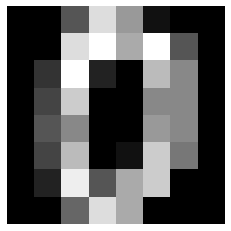

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

0처럼 보인다.

여러 개의 이미지를 한 번에 확인해보자.

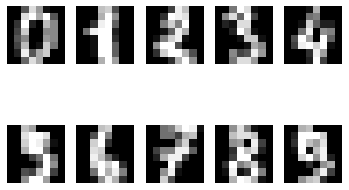

In [34]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

해상도가 낮은 이미지이기 때문에 흐릿하지만, 마음의 눈으로 보면 0부터 9까지의 숫자를 볼 수 있다.

그렇다면 `target` 데이터는 어떨까?

In [35]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

총 1797개의 데이터가 있고, 0부터 9까지의 숫자로 나타난다.<br>
바로 각 이미지 데이터가 어떤 숫자를 나타내는지를 담고 있는 데이터이다.

그러면, 우리는 어떤 문제를 풀어야 할까?<br>
붓꽃 문제와 같이, 각 이미지 데이터가 입력되었을 때 그 이미지가 숫자 몇을 나타내는 이미지인지를 맞추는 분류 모델을 학습시키면 된다.

다만, 이번에는 __정확도의 함정__을 확인하기 위한 실험이었기 때문에 약간의 장치를 넣어볼 것이다.

바로, 숫자 10개를 모두 분류하는 것이 아니라, 해당 이미지 데이터가 __3인지 아닌지__를 맞추는 문제로 변형해서 풀어보는 것이다.<br>
즉, 입력된 데이터가 3이라면 3을, 3이 아닌 다른 숫자라면 0을 출력하도록 하는 모델을 생각해보겠다.

그러려면, 우리는 `target`인 `digits_label`을 살짝 변형할 필요가 있다.

In [36]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

기존의 `label`인 `digits_label`에서 숫자가 3이라면 그대로 3을, 아니라면 0을 가지는 `new_label`을 만드는 것이다.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    new_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9638888888888889

96%라는 높은 성능이 나왔다.

바로 이곳에 함정이 있다. 어떤 함정일까? 우리가 풀려고 했던 문제를 생각해보자.<br>
우리는 총 10개의 숫자 중 3에만 집중을 해서, 3이라면 3으로, 3이 아니라면 0으로 맞추는 문제로 변형했었다.<br>
그런 이유로, 정답 데이터인 label은 0이 굉장히 많고 3은 적은 불균형 데이터가 되었다.<br>
9개의 숫자들은 label이 모두 0이 되었고, 3만 3으로 남아있었으니 대략 90%의 label이 모두 0이라는 이야기가 된다.

이것은 무엇을 의미할까? 잠시 생각해보자.

그렇다, 바로 모델이 전혀 학습하지 않고 __정답을 모두 0으로만 선택해도 정확도가 90%가량이 나오게 된다는 것__이다.<br>
실제로 확인해보자.

길이는 `y_pred`와 같으면서 `0`으로만 이루어진 리스트를 `fake_pred` 라는 변수로 저장해 보고, 이 리스트와 실제 정답인 `y_test`간의 정확도를 확인해보자.

In [38]:
fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.9055555555555556

어떤가? 우리는 어떠한 모델을 사용하지 않고 답을 0으로만 찍었을 뿐인데, 정확도가 90%가 나온다.<br>
이러한 문제는 불균형한 데이터, unbalanced 데이터에서 많이 발생할 수 있다.

즉, 정확도는 정답의 분포에 따라 모델의 성능을 잘 평가하지 못하는 척도가 될 수 있는 것이다.

그렇기 때문에 분류 문제에서는 정확도 외에 다양한 평가 척도를 사용한다. 무엇이 있는지 알아보도록 하자.

## 9. 내 모델은 얼마나 똑똑한가? 다양하게 평가해 보기 (2) 정답과 오답에도 종류가 있다!

위에서 확인한 정확도는 전체 데이터 중 맞은 데이터 만 신경쓰는 척도이다.<br>
하지만 얼마나 많은 양성 데이터를 맞았느냐도 중요하겠지만, 음성 데이터를 얼마나 안 틀렸느냐도 중요한 경우가 있다. 이는 문제에 따라 달라진다.

예를 들어, 코로나 바이러스가 의심되는 환자를 진단하는 경우, 실제 코로나에 걸리지 않았는데 걸린 것으로 오진을 하면 그래도 환자에게는 다행인 일이다.<br>
하지만 실제 코로나에 걸렸는데 걸리지 않았다고 오진을 하는 경우는 환자에게 치명적인 상황이 될 것이다.<br>
이렇듯 같은 오진이라도 양성을 잡아내는 데에 실패하는 오진과, 음성을 잡아내는 데에 실패하는 오진은 그 중요도가 다를 수 있다.

이러한 정답과 오답을 구분하여 표현하는 방법을 __오차행렬(confusion matrix)__ 이라고 한다.

오차행렬에 대해 설명하는 다음 글을 읽어보자.

* [What is Confusion Matrix and Advanced Classification Metrics?](https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html)

__오차행렬에서는 예측 결과를 네 가지로 구분한다__

* TN(True Negative)
* FP(False Positive)
* FN(False Negative)
* TP(True Positive)

__오차행렬에서 나타나는 성능 지표__

* Precision
* Negative Predictive Value
* Sensitivity
* Specificity
* Accuracy

오차행렬을 조금 더 자세히 살펴보자.

다음 그림에서 각 행은 실제 클래스(Actual Class)를 나타낸다.<br>
위에서 들었던 코로나의 예시를 계속 생각해 볼 때, Actual Class가 Positive라면 환자는 실제 코로나에 걸린 것이다.<br>
반대로 Actual Class가 Negative라면 환자는 건강하다.

반면 각 열은 예측된 클래스(Predicted Class)이다.<br>
Predicted Class가 Positive라면 진단 결과가 양성, Negative라면 진단 결과가 음성인 것을 말한다.

그래서 각 칸에 나타난 TP, FN, FP, TN은 다음과 같다.

* TP(True Positive) : 실제 환자에게 양성판정 (참 양성)
* FN(False Negative) : 실제 환자에게 음성판정 (거짓 음성)
* FP(False Positive) : 건강한 사람에게 양성판정 (거짓 양성)
* TN(True Negative) : 건강한 사람에게 음성판정 (참 음성)

<img src="./image/confusion_matrix.jpg" />

이러한 TP, FN, FP, TN의 수치로 계산되는 성능 지표 중 대표적으로 쓰이는 것은 __정밀도(Precision)__, __재현율(Recall, Sensitivity)__, __F1 스코어(f1 score)__이다.<br>
Recall은 위 그림에서 Sensitivity라고 표시된 지표와 같다. Sensitivity보다는 Recall이라는 용어가 더 보편적이니, Recall이라고 부르겠다.

Precision과 Recall, 그리고 F1 score, 그리고 원래 확인했던 정확도까지 수식은 각각 다음과 같다.

<img src="./image/confusion_matrix2.jpg" />

Precision과 Recall의 분자는 둘 다 $TP$이다. $TP$는 맞게 판단한 양성이므로, 이 값은 높을수록 좋다. 하지만 분모에는 각각 $FP$와 $FN$가 있다. 이 값들은 잘못 판단된 것들이므로 낮을수록 좋다. 즉, $TP$는 높고 $FP$또는 $FN$이 낮을수록 좋은 예측이므로, Precision과 Recall 값이 클수록 좋다. 다만, 둘은 다음과 같은 점이 다르다.

Precision은 분모에 있는 $FP$가 낮을수록 커잔다. Precision이 높아지려면 False Positive, 즉 음성인데 양성으로 판단하는 경우가 적어야 한다.

Recall은 분모에 있는 $FN$이 낮을수록 커진다. Recall이 높아지려면 False Negative, 즉 양성인데 음성으로 판단하는 경우가 적어야 한다.

다시 생각해보자.

- Precision이 크려면 음성인데 양성으로 판단하는 경우가 적어야 한다. 음성을 놓치지 말아야 한다는 것이다! 어떤 경우가 있을까?
- Recall이 크려면 양성인데 음성으로 판단하는 경우가 적어야 한다. 양성을 놓치지 말아야한다. 이건 어떤 경우가 있을까?

__전체 메일함에서 스팸 메일을 거르는 모델에게는 Precision이 더 중요할까, Recall이 더 중요할까? (스팸 메일을 positive, 정상 메일을 negative로 생각)__

* 메일 처리 모델은 스팸 메일을 못 거르는 것은 괜찮지만, **정상 메일을 스팸 메일로 분류하는 것은 더 큰 문제이다.** 즉, 음성을 양성으로 판단하면 안된다. 따라서 Precision이 더 중요하다.

__암 환자를 진단하는 모델에게는 Precision, Recall 중 무엇이 더 중요할까?__

* 암을 진단하는 경우 실제 환자를 한 명이라도 놓치면 안된다. 즉, 양성을 음성으로 판단하면 안 되기 때문에 Recall이 더 중요하다.

마지막으로 F1 score은 Recall과 Precision의 조화평균이다. Accuracy는 앞서 설명했듯 전체 데이터 중 올바르게 판단한 데이터 개수의 비율이다.

이제 이론은 이 정도로 마무리하고, scikit-learn으로 이 지표들을 확인하는 방법을 배워보겠다.

오차 행렬은 다음과 같이 **`sklearn.metrics`** 패키지 내의 **`confusion_matrix`**로 확인할 수 있다.

모델이 예측했던 손글씨 결과에 대해 확인해보자.

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[317,   9],
       [  4,  30]])

위에서 이미지로 봤던 오차행렬과 같이 각각은 왼쪽 위부터 순서대로 $TP$, $FN$, $FP$, $TN$의 개수를 나타낸다. 특히, 손글씨 문제에서의 `0`은 Positive 역할을, `3`은 Negative 역할을 한다. $TP$와 $TN$의 값이 320, 18로 비교적 크고 $FN$과 $FP$는 13, 9로 작다.

그러면 모든 숫자를 0으로 예측한 **`fake_pred`**의 경우는 어떨까?

In [40]:
confusion_matrix(y_test, fake_pred)

array([[326,   0],
       [ 34,   0]])

그렇다, 우리는 모든 데이터를 **0**, 즉 Positive로 예측했고 Negative로 예측한 것은 없기 때문에 $FN$과 $TN$은 둘 다 0이다.

그러면 이런 경우 Precision, Recall, f1 score는 각각 얼마가 되는지 확인해보자. **`sklearn.metrics`**의 **`classification_report`**를 활용하면 각 지표를 한 번에 확인할 수 있다.

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       326
           3       0.77      0.88      0.82        34

    accuracy                           0.96       360
   macro avg       0.88      0.93      0.90       360
weighted avg       0.97      0.96      0.96       360



여러 가지 점수가 출력되었다.

**`0`**은 개수가 333개로 많기 때문에 **`precision`**과 **`recall`**에서 모두 0.97, 0.96으로 어렵지 않게 높은 점수를 받았다. 반면 **`3`**은 27개 뿐이기 때문에 모두 맞추기가 어려웠나보다. **`precision`**과 **`recall`**은 각각 0.58, 0.67이 나왔다.

그렇다면 **`fake_pred`**는 어떨까?

In [42]:
print(classification_report(y_test, fake_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       326
           3       0.00      0.00      0.00        34

    accuracy                           0.91       360
   macro avg       0.45      0.50      0.48       360
weighted avg       0.82      0.91      0.86       360



/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

이게 무슨 일일까? **`0`**에 대한 precision과 recall은 0.93, 1로 매우 높지만 **`3`**에 대한 precision과 recall은 둘 다 0이다. 이는 큰 문제이다. **`0`**은 잘 잡아내지만, **`3`**은 단 하나도 맞추지 못했다는 뜻이기 때문이다.

다시 한 번, 정확도를 확인해보자.

In [43]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9638888888888889, 0.9055555555555556)

**`y_pred`**와 **`fake_pred`** 모두 0.94, 0.925로 큰 차이가 없다. 하지만 이제는 알 수 있다. 모델의 성능은 정확도만으로 평가하면 안된다는 것이다. 특히, **label이 불균형하게 분포되어있는 데이터**를 다룰 때에는 더 조심해야 한다.

Precision과 Recall이 각각 언제 중요해지는지를 이해하고, 때에 맞는 성능지표로 모델을 평가하자.

여기까지 분류 실습에 필요한 모든 이론적인 내용들을 배워보고, 직접 실습도 해 보았다.

## 10. 데이터가 달라도 문제 없어요!

위에서 했던 과정 그대로, 새로운 데이터셋을 찾아 해 보겠다. 시작해보자.

실습으로는 여러 데이터셋을 다양하게 진행해 보겠다. 데이터가 다르더라도 전체 흐름은 같기 때문에 쉽게 따라해 볼 수 있을 것이다. 아직 문자열이 들어간 복잡한 데이터를 다루는 방법은 배우지 않았으니, scikit-learn의 예제 데이터를 활용하기로 하자.

- 데이터셋 소개 : [사이킷런 toy datasets](https://scikit-learn.org/stable/datasets/index.html#toy-**datasets**)

위에 제공되는 Toy Dataset 중 분류 문제에 적합한 데이터셋은 다음과 같다.

- **`load_digits`** : 손글씨 이미지 데이터 ([링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits))
- **`load_wine`** : 와인 데이터 ([링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine))
- **`load_breast_cancer`** : 유방암 데이터 ([링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer))

우리가 위에서 했듯, 하나씩 데이터를 자세히 살펴보자. 어떤 데이터인지 아는 것은 모델 학습의 가장 기본이다.

__`load_digits` 데이터는 총 몇 개로 이루어져 있을까? feature와 label은 각각 무엇을 나타내는가?__

* 총 1797개, feature는 64개의 픽셀값 (8x8 이미지), label은 0~9 사이의 숫자

__`load_wine` 데이터는 총 몇 개로 이루어져 있을까? feature와 label은 각각 무엇을 나타내는가?__

* 총 178개, feature는 총 13개로, Alcohol, Malic acid, Color intensity 등 와인의 특성값이고, label은 class 0, 1, 2의 세 가지 카테고리가 있다.

## 11. 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다

아까 잠깐 다뤄보았던 손글씨 이미지를 제대로 0~9까지 열 가지 카테고리로 분류해 보는 실습을 해 보겠다.

다음 스텝을 참고해 jupyter notebook에 코드를 작성하여 제출하자.

### (1) 필요한 모듈 import하기
---
```python
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
```

### (2) 데이터 준비

---

**`load_digits`** 메서드를 사용한다.

### (3) 데이터 이해하기

---

지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴보자.

- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

### (4) train, test 데이터 분리

---

모델 학습과 테스트용 문제지와 정답지를 준비해보자. X_train, X_test, y_train, y_test를 생성하는 방법을 참고하자.

### (5) 다양한 모델로 학습시켜보기

---

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어보자. 어떤 모델이 가장 좋은 성능을 보일까?

- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

### (6) 모델을 평가해 보기

---

학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까? 모델의 성능을 평가하는 지표로는 무엇이 좋을까? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해보자.

## 12. 프로젝트 (2) load_wine : 와인을 분류해 봅시다
이번에는 와인 데이터이다. 와인의 어떤 특징으로 와인의 종류를 분류해 볼 수 있을까?

데이터에 어떤 정보가 담겨있는지, feature는 무엇이고 label은 무엇인지 확인해 보면서 진행하는 점, 잊지말자

### (1) 필요한 모듈 import하기

---

```python
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
```

### **(2) 데이터 준비**

---

**`load_wine`** 메서드를 사용한다.

### (3) 데이터 이해하기

---

지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴보자.

- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

### (4) train, test 데이터 분리

---

모델 학습과 테스트용 문제지와 정답지를 준비해보자. X_train, X_test, y_train, y_test를 생성하는 방법을 참고하자.

### (5) 다양한 모델로 학습시켜보기

---

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어보자. 어떤 모델이 가장 좋은 성능을 보일까?

- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

### (6) 모델을 평가해 보기
---
학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까? 모델의 성능을 평가하는 지표로는 무엇이 좋을까? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택하자.

## 13. 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다
마지막으로 유방암 여부를 진단해 보겠다.<br>
이 데이터 또한 여러 사람의 건강 지표에 대한 데이터가 feature로 들어가있고, 유방암의 여부가 True, False로 label이 된다.

주어진 데이터로 환자의 유방암 여부를 분류해 볼 수 있을까?

### (1) 필요한 모듈 import하기

---

```python
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
```

### (2) 데이터 준비

---

**`load_breast_cancer`** 메서드를 사용한다.

### (3) 데이터 이해하기

---

지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴보자.

- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

### (4) train, test 데이터 분리

---

모델 학습과 테스트용 문제지와 정답지를 준비해보자.<br>
X_train, X_test, y_train, y_test를 생성하는 방법을 참고하자.

### (5) 다양한 모델로 학습시켜보기

---

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어보자. 어떤 모델이 가장 좋은 성능을 보일까?

- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

### (6) 모델을 평가해 보기

---

학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까? 모델의 성능을 평가하는 지표로는 무엇이 좋을까? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해보자